In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Preprocessing and Feature Engineering

In [3]:
# Let's change names of our columns to get a more better intuition
data.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

In [4]:
# Binning Heart rate (Here, we will group MaxHeartRateAchivied into three categories(Low, Medium and High))
bins = [50,100,150,210]
labels = ['low', 'medium', 'High']
data['Heart_rate_status'] = pd.cut(data['MaxHeartRateAchivied'],bins=bins,labels=labels)

In [5]:
# Binning Cholestrol
bins = [100,300,600]
label=['Normal','High']
data['Cholestrol_level'] = pd.cut(data['Cholestrol'],bins=bins,labels=label)

In [ ]:
# Binning BloodPressure
bins = [70,140,200]
label = ['Normal', 'High']
data['bp_level'] = pd.cut(data['RestingBloodPressure'],bins=bins,labels=label)

### We are binning three attributes here because these were having outliers and it makes a better sense to understand the data too(for humans as well as machines)

In [8]:
# Now deleting those columns for which we have already created new features
df = data.drop(['RestingBloodPressure', 'Cholestrol', 'MaxHeartRateAchivied'], axis=1)
df.head()

,Age,Gender,ChestPain,FastingBloodSugar,RestingECG,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target,Heart_rate_status,Cholestrol_level,bp_level
0,63,1,3,1,0,0,2.3,0,0,1,1,medium,Normal,High
1,37,1,2,0,1,0,3.5,0,0,2,1,High,Normal,Normal
2,41,0,1,0,0,0,1.4,2,0,2,1,High,Normal,Normal
3,56,1,1,0,1,0,0.8,2,0,2,1,High,Normal,Normal
4,57,0,0,0,1,1,0.6,2,0,2,1,High,High,Normal


In [9]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
enc_df = df.copy()

categ_cols = ['Heart_rate_status','Cholestrol_level','bp_level']
for cols in categ_cols:
    enc_df[cols] = encoder.fit_transform(enc_df[cols])

In [11]:
enc_df.head()

,Age,Gender,ChestPain,FastingBloodSugar,RestingECG,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target,Heart_rate_status,Cholestrol_level,bp_level
0,63,1,3,1,0,0,2.3,0,0,1,1,2,1,0
1,37,1,2,0,1,0,3.5,0,0,2,1,0,1,1
2,41,0,1,0,0,0,1.4,2,0,2,1,0,1,1
3,56,1,1,0,1,0,0.8,2,0,2,1,0,1,1
4,57,0,0,0,1,1,0.6,2,0,2,1,0,0,1


In [13]:
# Prreparing dependent and independent attributes
X = enc_df.drop(['Target'],axis=1)
y = enc_df['Target']

In [14]:
# Scaling all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_scaled, y, test_size=0.2, random_state=42)
print('Shape of X_train is {} and y_train is {}'.format(X_train.shape, y_train.shape))
print('Shape of X_test is {} and y_test is {}'.format(X_test.shape, y_test.shape))

Shape of X_train is (242, 13) and y_train is (242,)
Shape of X_test is (61, 13) and y_test is (61,)


In [17]:
# Importing all the Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [18]:
from sklearn.metrics import accuracy_score
models = [lr, svm, dt, rf]
scores=[]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append({'Model_name':model, 'Score':score})

test_scores = pd.DataFrame(scores)
test_scores

,Model_name,Score
0,LogisticRegression(),0.868852
1,SVC(),0.901639
2,DecisionTreeClassifier(),0.721311
3,"(DecisionTreeClassifier(max_features='auto', r...",0.836066


In [19]:
from sklearn.model_selection import cross_val_score
cv_scores=[]
for model in models:
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    cv_scores.append({'Model':model, 'Cv_scores':cv_score})

CV_Scores = pd.DataFrame(cv_scores)
CV_Scores

,Model,Cv_scores
0,LogisticRegression(),0.809779
1,SVC(),0.814031
2,DecisionTreeClassifier(),0.760374
3,"(DecisionTreeClassifier(max_features='auto', r...",0.818112


In [20]:
# Hyperparameter Tuning
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [0.01,1,5,10,20],
            'kernel': ['rbf','linear'],
            'gamma':[0.01,0.03,0.05,0.1,0.5,1]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,20,30,35,40,100],
            'max_depth': [3,5,7,8,9,None]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs'),
        'params': {
            'C': [0.01,0.1,0.3,0.5,1,2,3,5]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth':[3,4,6,8]
                  }
}
}

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({'model':model_name,
                    'best_score':clf.best_score_,
                    'best_parameter':clf.best_params_})

Scores = pd.DataFrame(scores)
Scores

,model,best_score,best_parameter
0,svm,0.826531,"{'C': 20, 'gamma': 0.01, 'kernel': 'rbf'}"
1,random_forest,0.847109,"{'max_depth': 9, 'n_estimators': 20}"
2,logistic_regression,0.813861,{'C': 0.5}
3,decision_tree,0.772874,{'max_depth': 4}


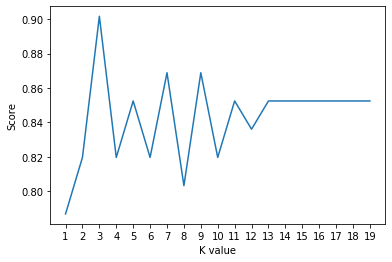

Maximum KNN Score is 90.16%


In [23]:
from sklearn.neighbors import KNeighborsClassifier
Knn_score = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    Knn_score.append(knn.score(X_test, y_test))
    
plt.plot(range(1,20), Knn_score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(Knn_score)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

### Knn has done best till yet. It is giving 90.16% accuracy with optimal k-value = 3

In [46]:
# Testing on random forest
rf = RandomForestClassifier(n_estimators=40,max_depth=3,random_state=0)
rf.fit(X_train,y_train)
print('Accuracy on train data is {}'.format(rf.score(X_train,y_train)))
print('Accuracy on test data is {}'.format(rf.score(X_test,y_test)))

Accuracy on train data is 0.871900826446281
Accuracy on test data is 0.8688524590163934


In [ ]:
# Testing on logistic Regression
lr = LogisticRegression(C=0.03)
lr.fit(X_train,y_train)
print('Accuracy on train data(logistic regression) is {}'.format(lr.score(X_train,y_train)))
print('Accuracy on test data(logistic regression) is {}'.format(lr.score(X_test,y_test)))

### Now, we are moving to our next tool i.e., Voting Classifiers. Voting classifiers are ensemble techniques which consists of more than one model of various types,they are very powerful algorithms.It's good to always give a try on them.

In [47]:
# Testing Voting Classifier(rf+lr)
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(estimators = [('lr', lr), ('rf', rf)],
                      voting = 'hard')
vot.fit(X_train,y_train)
print('Accuracy on train data using voting clf(rf+lr) is {}'.format(vot.score(X_train,y_train)))
print('Accuracy on test data using voting clf(rf+lr) is {}'.format(vot.score(X_test,y_test)))

Accuracy on train data using voting clf(rf+lr) is 0.8636363636363636
Accuracy on test data using voting clf(rf+lr) is 0.8852459016393442


In [78]:
# Parameter tuning of Voting classifier(lr+rf)
vot_params = {'lr_clf__C': [0.001,0.01,0.1,0.5,1,5],
      'rf_clf__max_depth': [3,5,6,8,10],
         'rf_clf__n_estimators':[10,20,25,30,35,40,45,50]}

lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
vot_clf = VotingClassifier(estimators = [('lr_clf', lr_clf), ('rf_clf', rf_clf)],
                      voting = 'hard')

grid = GridSearchCV(vot_clf,vot_params,cv=5)
grid.fit(X_train,y_train)
print('Best score for vot(lr+rf) is {} '.format(grid.best_score_))
print('Best parameter for vot(lr+rf) is {} '.format(grid.best_params_))

Best score for vot(lr+rf) is 0.846938775510204 
Best parameter for vot(lr+rf) is {'lr_clf__C': 0.001, 'rf_clf__max_depth': 10, 'rf_clf__n_estimators': 40} 


In [79]:
lr_clft = LogisticRegression(C=0.001)
rf_clft = RandomForestClassifier(max_depth=10, n_estimators=40, random_state=0)
vot_clft = VotingClassifier(estimators = [('lr', lr_clft), ('rf', rf_clft)],
                      voting = 'hard')
vot_clft.fit(X_train,y_train)
print('Accuracy on train data using tuned voting clf(rf+lr) is {}'.format(vot_clft.score(X_train,y_train)))
print('Accuracy on test data using tuned voting clf(rf+lr) is {}'.format(vot_clft.score(X_test,y_test)))

Accuracy on train data using tuned voting clf(rf+lr) is 0.9958677685950413
Accuracy on test data using tuned voting clf(rf+lr) is 0.8688524590163934


In [83]:
# Testing Voting Classifier(knn+lr)
from sklearn.ensemble import VotingClassifier
vot2 = VotingClassifier(estimators = [('lr', LogisticRegression(C=0.03)), ('knn', KNeighborsClassifier(n_neighbors=3))],
                      voting = 'hard')
vot2.fit(X_train,y_train)
print('Accuracy on train data using voting clf(knn+lr) is {}'.format(vot2.score(X_train,y_train)))
print('Accuracy on test data using voting clf(knn+lr) is {}'.format(vot2.score(X_test,y_test)))

Accuracy on train data using voting clf(knn+lr) is 0.871900826446281
Accuracy on test data using voting clf(knn+lr) is 0.9180327868852459


In [85]:
vot3 = VotingClassifier(estimators = [('lr', LogisticRegression(C=0.03)), ('knn', KNeighborsClassifier(n_neighbors=3)),
                                    ('rf', RandomForestClassifier(n_estimators=40,max_depth=3,random_state=0))],
                      voting = 'hard')
vot3.fit(X_train,y_train)
print('Accuracy on train data using voting clf(knn+rf+lr) is {}'.format(vot3.score(X_train,y_train)))
print('Accuracy on test data using voting clf(knn+rf+lr) is {}'.format(vot3.score(X_test,y_test)))

Accuracy on train data using voting clf(knn+rf+lr) is 0.871900826446281
Accuracy on test data using voting clf(knn+rf+lr) is 0.8688524590163934


## As we have seen, we tried several algorithms and Voting Classifier(Knn+lr) was giving us the best results so we will use this model as our final model.